In [11]:
import numpy as np
import scipy.linalg as linalg
import scipy.linalg.interpolative as inter
import matplotlib.pyplot as plt

In [12]:
def kernelT(t, w, beta):
    #print(t)
    return np.exp(-w*t)+np.exp(-w*(beta-t))

def getKerT(tlist, wlist, beta):
    tlist=np.array(tlist)
    wlist=np.array(wlist)
    KerT=np.zeros([len(tlist), len(wlist)])
    #for ti, t in enumerate(tlist):
    for wi, w in enumerate(wlist):
        KerT[:, wi]= kernelT(tlist, w, beta)
    return KerT

def DLRt(KerT, k):
    it, proj = inter.interp_decomp(KerT.T, k)
    tGrid=np.sort(it[:k])
    return tGrid

In [13]:
def kernelW(nlist, w, beta):
    wn=2.0*np.pi*nlist/beta
    x=w*beta
    if x<1.0e-5:
        kernel=np.zeros(len(nlist))
        for ni, flag in enumerate((nlist==0)):
            if flag:
                kernel[ni]=(2.0-x)*beta
            else:
                kernel[ni]=2.0*w*(x-x*x/2.0)/(wn[ni]**2+w**2)
            return kernel
    else:
        return 2.0*w*(1.0-np.exp(-x))/(wn**2+w**2)
    
def getKerW(nlist, wlist, beta):
    nlist=np.array(nlist)
    wlist=np.array(wlist)
    KerW=np.zeros([len(nlist), len(wlist)])
    #for ni, n in enumerate(nlist):
    for wi, w in enumerate(wlist):
        KerW[:, wi]= kernelW(nlist, w, beta)
        
    return KerW

def DLRwn(KerW, eps):
    k, idx, proj = inter.interp_decomp(KerW, eps)
    wGrid=np.sort(idx[:k])
    iWn, proj = inter.interp_decomp(KerW[:, idx[:k]].T, k)
    wnGrid=np.sort(iWn[:k])
    return k, wGrid, wnGrid

In [14]:
Wmax=6.0
wN=1024
dW=Wmax/wN
beta=25.0
Nt=int(beta*Wmax*100)
Nwn=int(Wmax*beta/2.0/np.pi*100)
eps=1.0e-16
print("Nt: ", Nt)
print("Nwn: ", Nwn)

Nt:  15000
Nwn:  2387


In [15]:
nlist=range(Nwn)
wlist=[wi*dW for wi in range(wN)]
KerW=getKerW(nlist, wlist, beta)

rank:  38
freq grids:  [0.00000000e+00 5.85937500e-03 1.17187500e-02 1.75781250e-02
 2.34375000e-02 2.92968750e-02 3.51562500e-02 4.10156250e-02
 4.68750000e-02 5.27343750e-02 5.85937500e-02 6.44531250e-02
 7.03125000e-02 7.61718750e-02 8.20312500e-02 1.28906250e-01
 2.05078125e-01 2.92968750e-01 4.51171875e-01 4.98046875e-01
 6.38671875e-01 8.14453125e-01 1.04296875e+00 1.30664062e+00
 1.61132812e+00 1.94531250e+00 2.31445312e+00 2.71875000e+00
 2.96484375e+00 3.24023438e+00 3.85546875e+00 4.21875000e+00
 4.62304688e+00 5.03320312e+00 5.44335938e+00 5.79492188e+00
 5.92382812e+00 5.99414062e+00]
Matfreq grids:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  24  25  26  27  28  30  31  32  33  36  39  49  68
 116 189]


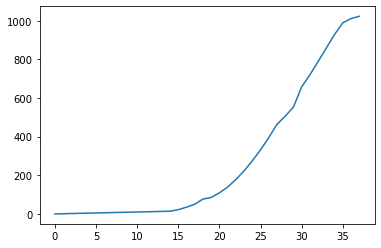

In [16]:
k, wGrid, wnGrid=DLRwn(KerW, eps)
#wGrid=wGrid*dW
print("rank: ", k)
print("freq grids: ", wGrid*dW)
print("Matfreq grids: ", wnGrid)
plt.figure()
plt.plot(wGrid)
plt.show()

In [7]:
Nt=100000
dt=beta/(Nt-1)
tlist=[ti*dt for ti in range(Nt)]
KerT=getKerT(tlist, wGrid*dW, beta)

In [8]:
tGrid=DLRt(KerT, k)
tGrid=tGrid*dt
tGrid=(tGrid+beta-tGrid[::-1])/2.0
print("Tau grids:", tGrid)

Tau grids: [8.50008500e-03 7.55007550e-02 1.35001350e-01 1.79501795e-01
 5.15755158e-01 6.58381584e-01 8.88133881e-01 9.30259303e-01
 1.67676677e+00 2.34577346e+00 2.40477405e+00 2.73615236e+00
 3.77528775e+00 5.88255883e+00 7.63807638e+00 8.20033200e+00
 9.20084201e+00 9.88534885e+00 1.06527315e+01 1.15336153e+01
 1.25000000e+01 1.34663847e+01 1.43472685e+01 1.51146511e+01
 1.57991580e+01 1.67996680e+01 1.73619236e+01 1.91174412e+01
 2.12247122e+01 2.22638476e+01 2.25952260e+01 2.26542265e+01
 2.33232332e+01 2.40697407e+01 2.41118661e+01 2.43416184e+01
 2.44842448e+01 2.48204982e+01 2.48649986e+01 2.49244992e+01
 2.49914999e+01]
